In [1]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
import xgboost as xgb
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df=pd.read_csv('malicious_phish.csv')
print(df.shape)
df['type'].value_counts()


(651194, 2)


type
benign        428106
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [3]:
df_benign = df[df.type=='benign']
df_deface = df[df.type=='defacement']
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']

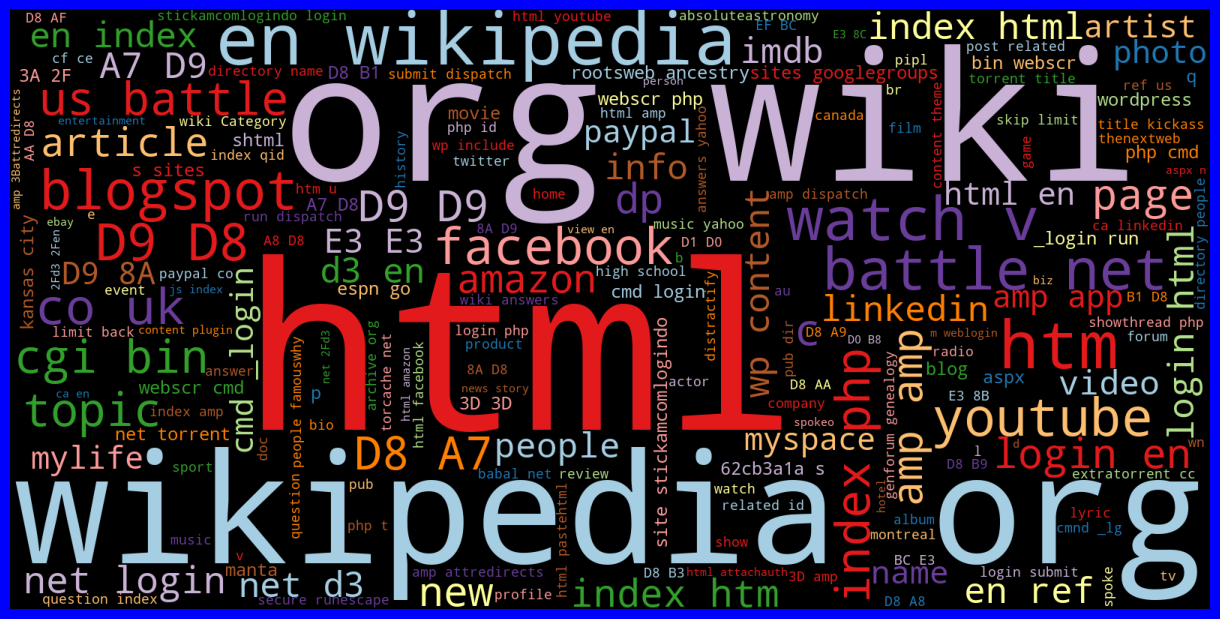

In [4]:
benign_url = " ".join(i for i in df_benign.url)
wc = WordCloud(width=1600, height=800,colormap='Paired').generate(benign_url)
plt.figure( figsize=(12,14),facecolor='blue')
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

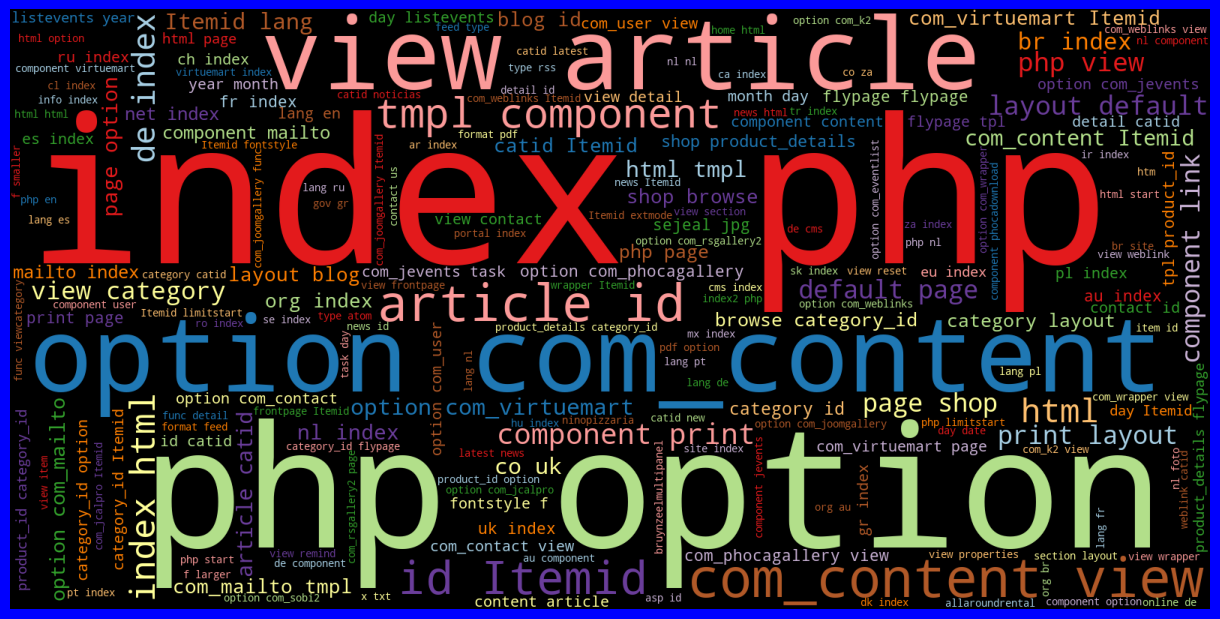

In [5]:
deface_url = " ".join(i for i in df_deface.url)
wc = WordCloud(width=1600, height=800,colormap='Paired').generate(deface_url)
plt.figure( figsize=(12,14),facecolor='blue')
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

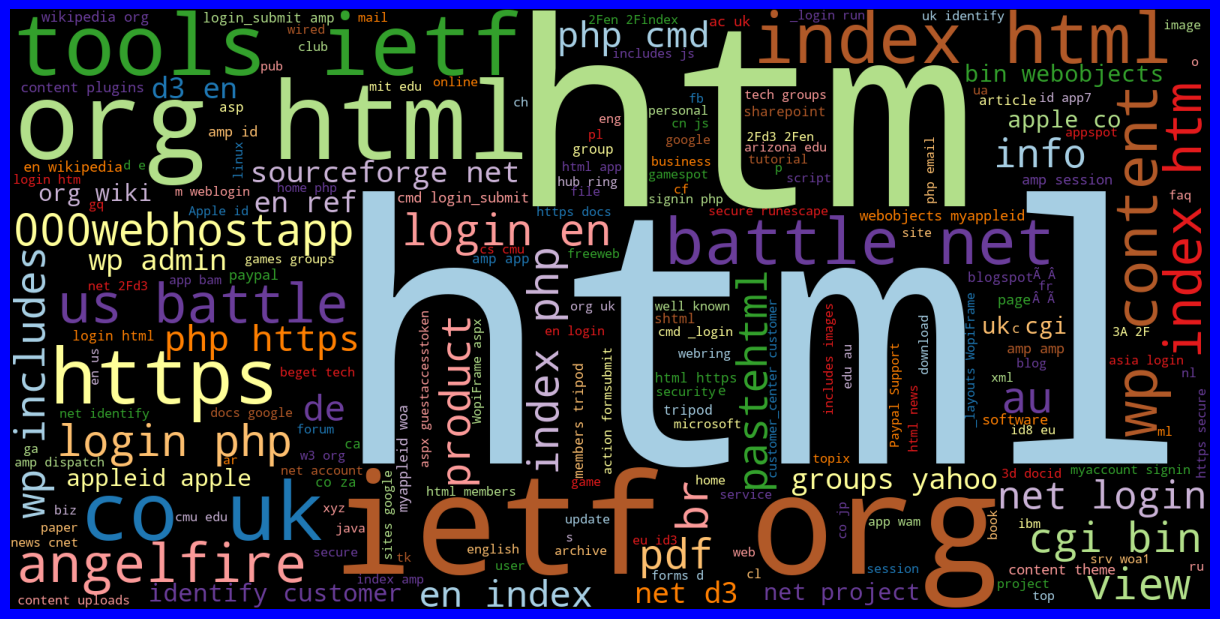

In [6]:
phish_url = " ".join(i for i in df_phish.url)
wc = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='blue')
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

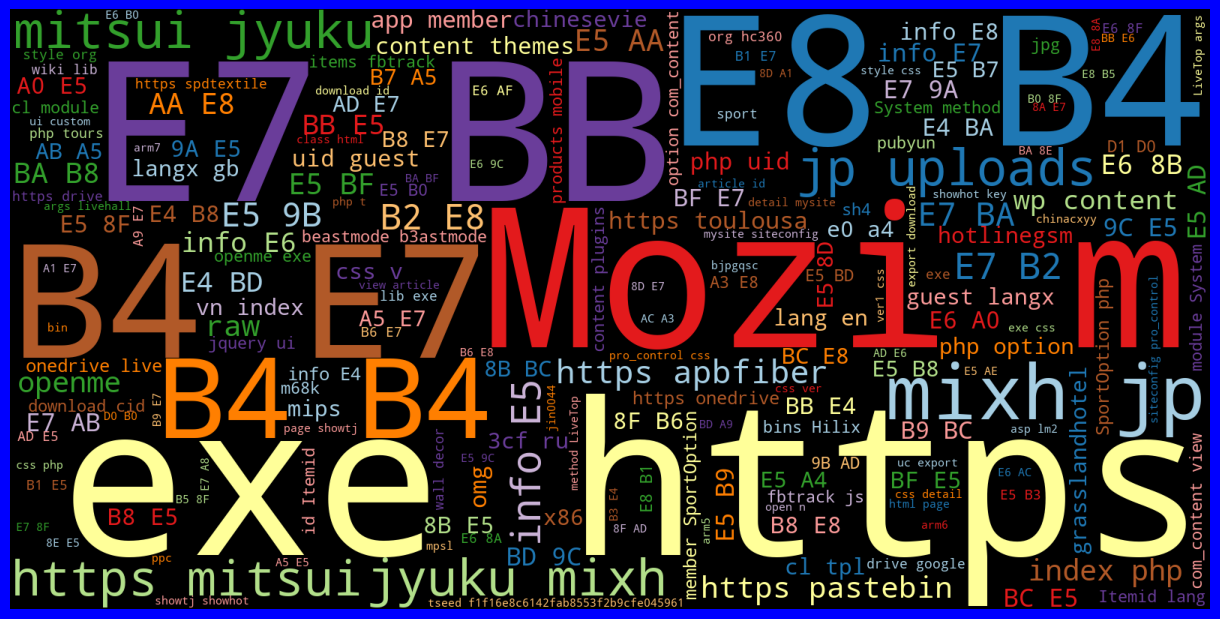

In [7]:
malware_url = " ".join(i for i in df_malware.url)
wc = WordCloud(width=1600, height=800,colormap='Paired').generate(malware_url)
plt.figure( figsize=(12,14),facecolor='blue')
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
import re
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)
    if match:
        return 1
    else:
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [9]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [10]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot
df['count.'] = df['url'].apply(lambda i: count_dot(i))
df.head()

,url,type,use_of_ip,abnormal_url,count.
0,br-icloud.com.br,phishing,0,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2


In [11]:
def count_www(url):
    return url.count('www')
df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):
    return url.count('@')
df['count@'] = df['url'].apply(lambda i: count_atrate(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|''yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|''short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|''doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|''q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|''x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|''tr\.im|link\.zip\.net',url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [12]:
def count_https(url):
    return url.count('https')
df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')
df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [13]:
def count_per(url):
    return url.count('%')
df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')
df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')
df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')
df['count='] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))
df['url_length'] = df['url'].apply(lambda i: url_length(i))

def hostname_length(url):
    return len(urlparse(url).netloc)
df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr', url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

df['count-letters']= df['url'].apply(lambda i: letter_count(i))

df.head()

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,...,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0,...,0,0,0,1,0,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0,...,0,0,0,0,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0,...,0,0,0,0,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0,...,1,0,1,1,4,88,21,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0,...,1,0,1,1,3,235,23,0,22,199


In [14]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

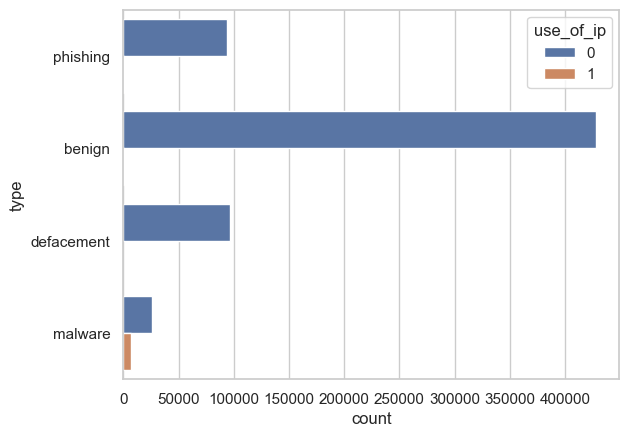

In [15]:
sns.set(style="whitegrid")
ax=sns.countplot(y="type",data=df,hue="use_of_ip")

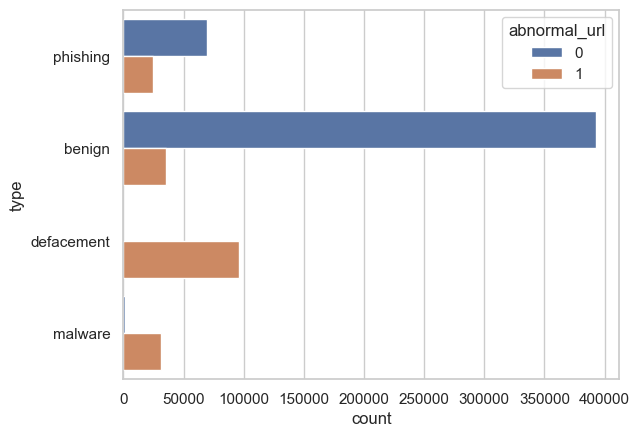

In [16]:
sns.set(style="whitegrid")
ax = sns.countplot(y="type", data=df, hue="abnormal_url")

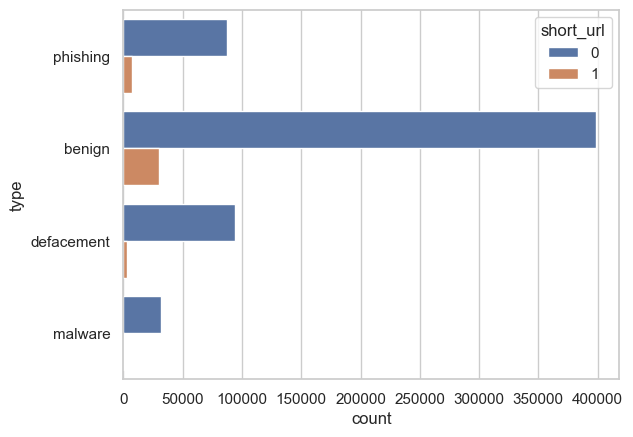

In [17]:
sns.set(style="whitegrid")
ax = sns.countplot(y="type", data=df, hue="short_url")

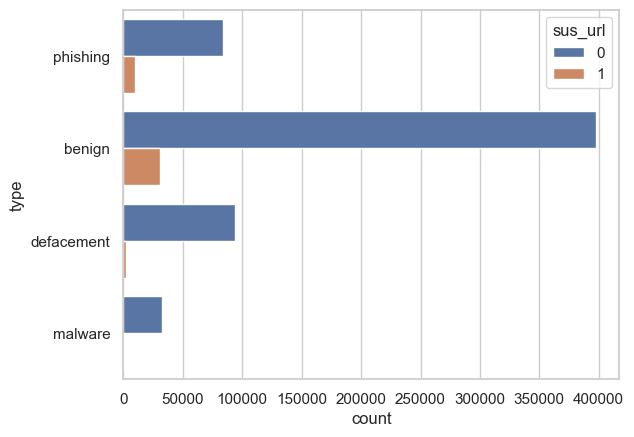

In [18]:
sns.set(style="whitegrid")
ax = sns.countplot(y="type", data=df, hue="sus_url")

Distribution of Count dot(.)

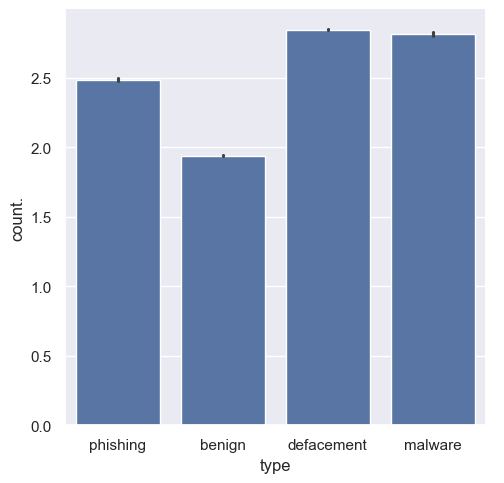

In [19]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count.", kind="bar", data=df)

Distribution of Count www

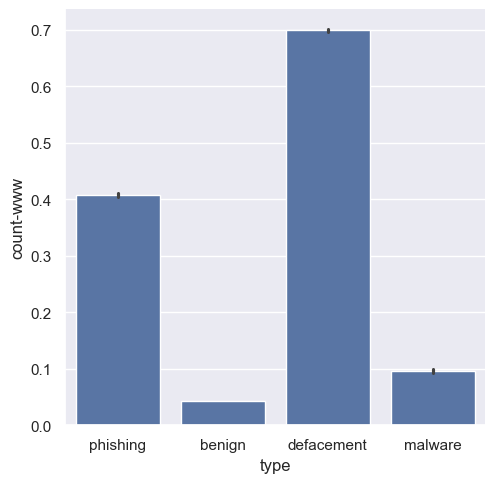

In [20]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-www", kind="bar", data=df)

Distribution of Count @

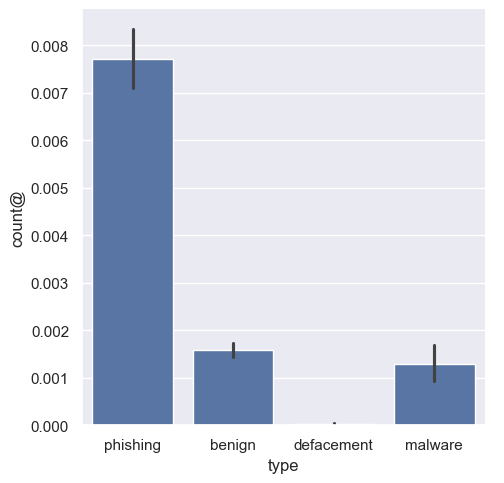

In [21]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count@", kind="bar", data=df)

Distribution of Count dir

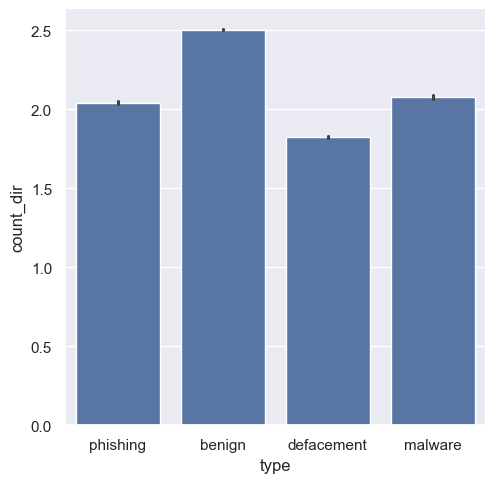

In [22]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_dir", kind="bar", data=df)

Distribution of hostname length

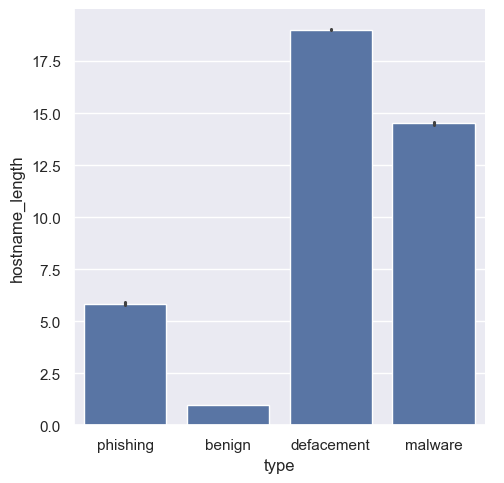

In [23]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="hostname_length", kind="bar", data=df)

Distribution of first directory length

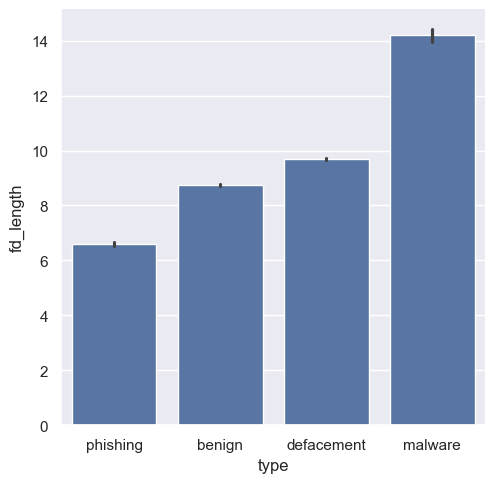

In [24]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="fd_length", kind="bar", data=df)

Distribution of top-level domain length

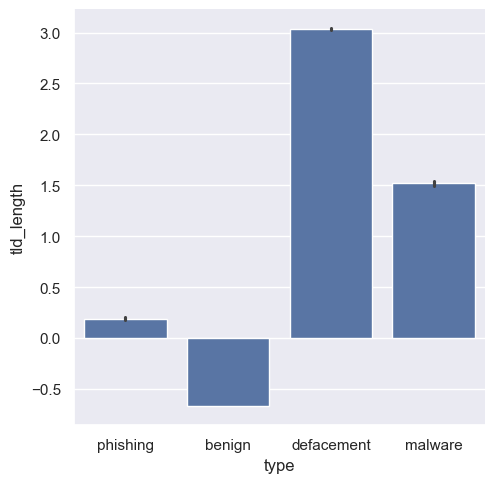

In [25]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="tld_length", kind="bar", data=df)

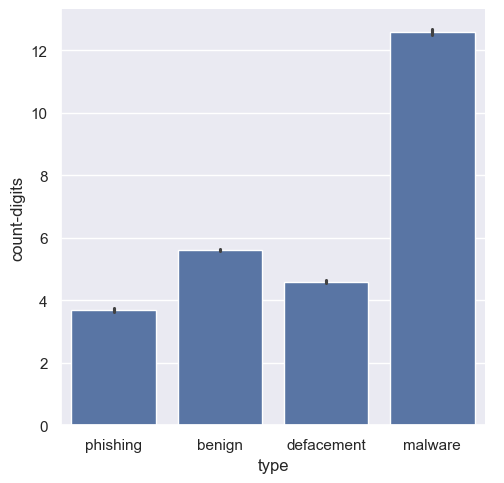

In [26]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-digits", kind="bar", data=df)

Target Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

type_code
0    428106
1     96457
3     94111
2     32520
Name: count, dtype: int64

Creation of Feature & Target

In [28]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]
y = df['type_code']
X.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,0,2,0,0,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,13
1,0,0,2,0,0,2,0,0,0,0,...,0,0,0,35,0,0,5,-1,1,29
2,0,0,2,0,0,3,0,0,0,0,...,0,0,0,31,0,0,7,-1,1,25
3,0,1,3,1,0,1,0,0,0,1,...,1,1,4,88,21,0,9,2,7,63
4,0,1,2,0,0,1,0,0,0,1,...,1,1,3,235,23,0,9,3,22,199


Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

Model Building

A. Light GBM Classifier

In [30]:
from sklearn import metrics
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5 ,random_state=5)
LGB_C = lgb.fit(X_train, y_train)
y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred_lgb,target_names=['benign', 'defacement','phishing','malware']))
score = metrics.accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.611845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 520955, number of used features: 21
[LightGBM] [Info] Start training from score -0.419436
[LightGBM] [Info] Start training from score -1.909718
[LightGBM] [Info] Start training from score -2.996952
[LightGBM] [Info] Start training from score -1.934330
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.96      0.99      0.98     19292
    phishing       0.97      0.91      0.94      6504
     malware       0.90      0.83      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130

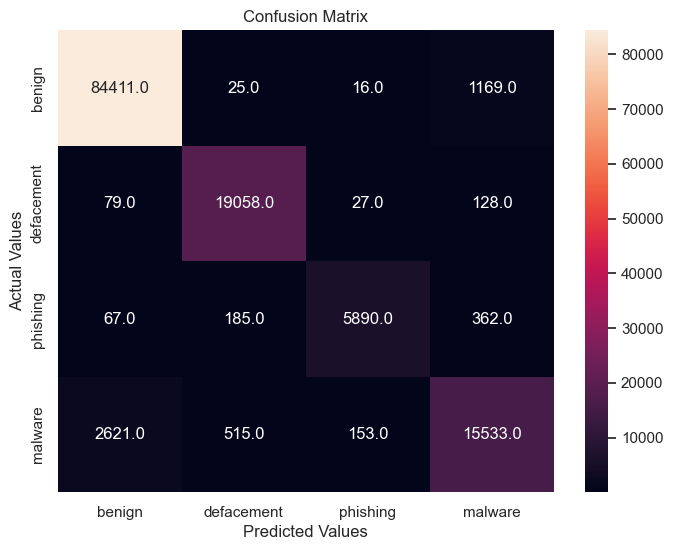

In [31]:
cm = confusion_matrix(y_test, y_pred_lgb)
cm_df = pd.DataFrame(cm,index = ['benign', 'defacement','phishing','malware'], columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

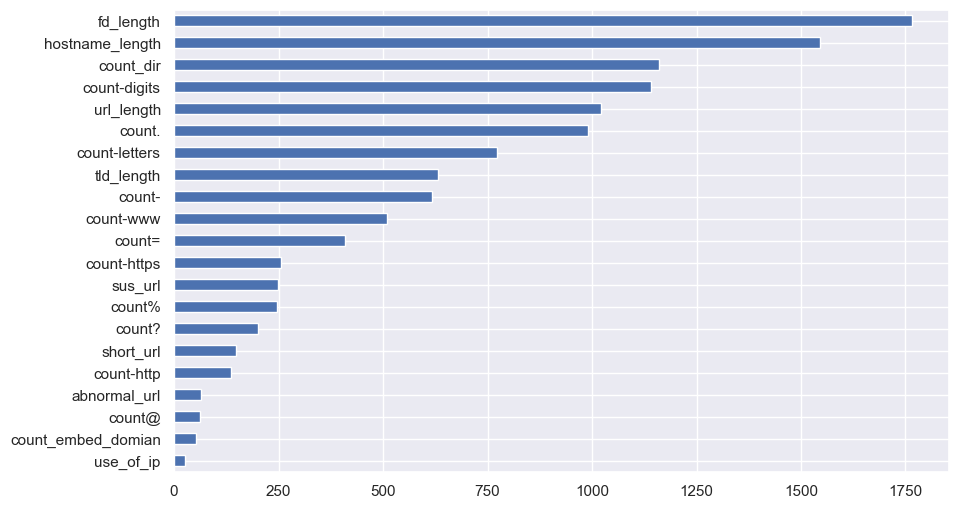

In [32]:
feat_importances = pd.Series(lgb.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

In [33]:
import json
import joblib

joblib.dump(lgb, 'lgb_model.pkl')
joblib.dump(lb_make, 'label_encoder.pkl')
feature_columns = list(X.columns)
with open('feature_columns.json', 'w') as f:
    json.dump(feature_columns, f)

print("Model, LabelEncoder, and feature columns saved successfully!")

Model, LabelEncoder, and feature columns saved successfully!


B. XGBoost Clssifier

In [34]:
xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(X_train,y_train)
y_pred_x = xgb_c.predict(X_test)
print(classification_report(y_test,y_pred_x,target_names=['benign', 'defacement','phishing','malware']))
score = metrics.accuracy_score(y_test, y_pred_x)
print("accuracy:   %0.3f" % score)


              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.97      0.99      0.98     19292
    phishing       0.98      0.92      0.95      6504
     malware       0.91      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.962


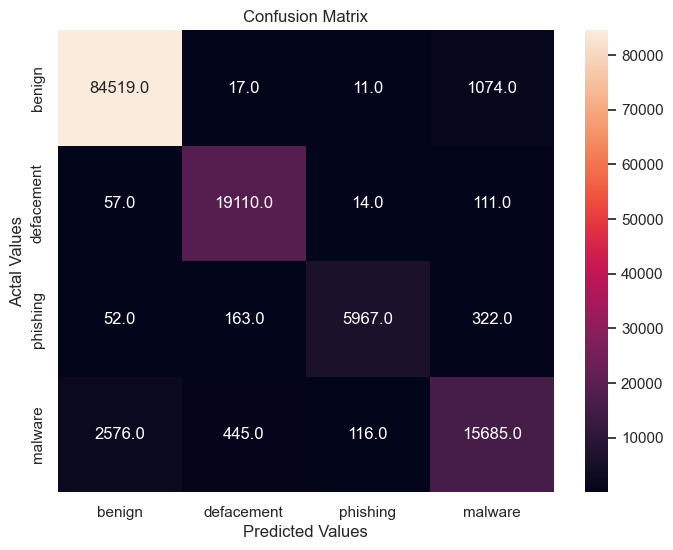

In [35]:
cm = confusion_matrix(y_test, y_pred_x)
cm_df = pd.DataFrame(cm,index = ['benign', 'defacement','phishing','malware'], columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

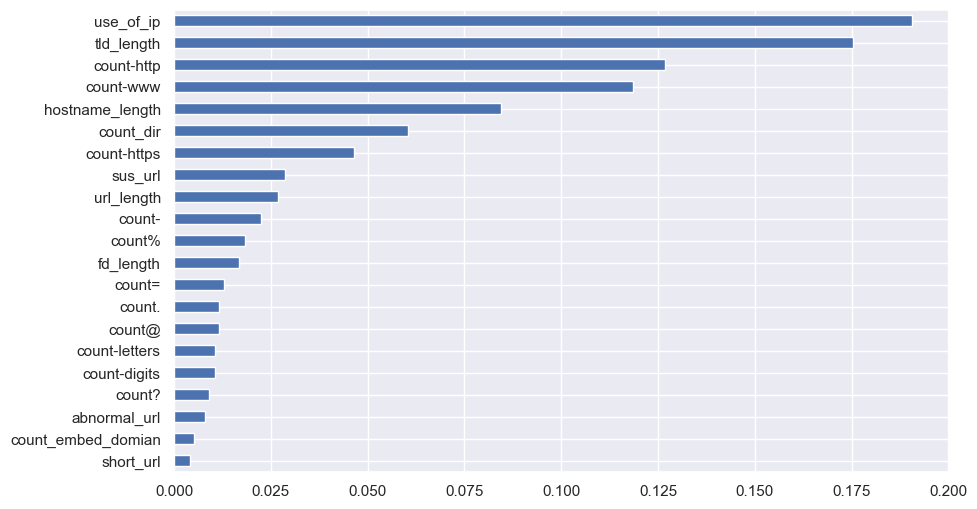

In [36]:
feat_importances = pd.Series(xgb_c.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

Prediction

In [37]:
def main(url):
    status = []
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
    status.append(tld_length(tld))
    return status

In [38]:
def check(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))
    pred = lgb.predict(features_test)
    if (int(pred[0]) == 0):
        return "Safe"
    else:
        return "Unsafe"

In [39]:
urls = ['http://9779.info/%E5%84%BF%E7%AB%A5%E7%AB%8B%E4%BD%93%E7%BA%B8%E8%B4%B4%E7%94%BB/','https://unstop.com/hackathons/flipkart-grid-50-software-development-track-flipkart-grid-50-flipkart-686157?utm_source=Flipkart-Grid&utm_medium=Placement-Cells&ref=QNMSy2Sh','https://netmovies.to/movies/mission-impossible-dead-reckoning-part-one-2023/','linkedin.com/learning/paths/career-essentials-in-cybersecurity-by-microsoft-and-linkedin']
for url in urls:
     print(check(url))

Unsafe
Safe
Unsafe
Safe
